# OpenCV - Resize an image
## How To Resize Without Distortion #PyVisionSeries - Episode #05

### 00 step # Importing all the Libs

In [1]:
import os
import time
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 01 step # Importing the Image to Work with

(3448, 4592, 3)

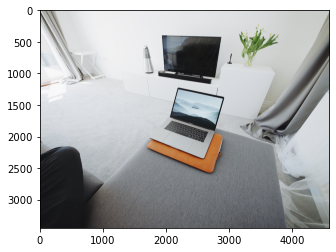

In [2]:
# From unsplash download https://unsplash.com/photos/U6s5gwdkQBk
f = 'tv_laptop.jpg'
path = 'DATA/'+f
img = cv2.imread(path)
# Correcting coloring for MatPlotLib
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
i = plt.imshow(img, cmap='gray')
img.shape

### 02 step # Showing the Problem - Trying to Do a Raw Resize :/

(200, 200, 3)

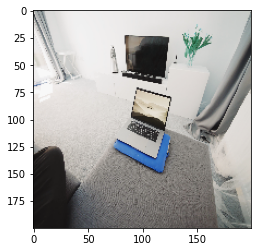

In [3]:
resized = cv2.resize(img, (200,200), cv2.INTER_AREA)
# Correcting coloring for MatPlotLib
img = cv2.cvtColor(resized, cv2.COLOR_RGB2BGR)
i = plt.imshow(img, cmap='gray')
img.shape

### 03 step # Find The Size of the Original Image

3448 4592


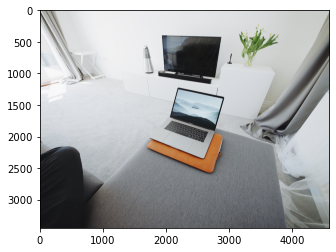

In [4]:
# reload everything
f = 'tv_laptop.jpg'
path = 'DATA/'+f
img = cv2.imread(path)
img = img.copy()
# Correcting coloring for MatPlotLib
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
i = plt.imshow(img, cmap='gray')
img.shape

# Saving height(h) for variable h, and length for w
# Use Tuple unpacking tecnique
h, w = img.shape[:2]
print(h, w)

### 04 step # What Size do You Want to Convert the Image to?

In [5]:
size = (200,200)
sh, sw = size
print(sh, sw)

200 200


### 05 step # Choose an OpenCV Interpolation Method

In [6]:
# interpolation method
if h > sh or w > sw: # shrinking image
    interp = cv2.INTER_AREA
else: # stretching image
    interp = cv2.INTER_CUBIC

### 06 step # Calculate the Pads in case the Images are Horizontal or Vertical

In [7]:
# aspect ratio of image
aspect = w/h
print(f"The original aspect ratio is {aspect:.3}")


# compute scaling and pad sizing
if aspect > 1: # horizontal image
    new_w = sw
    new_h = np.round(new_w/aspect).astype(int)
    pad_vert = (sh-new_h)/2
    pad_top, pad_bot = np.floor(pad_vert).astype(int), np.ceil(pad_vert).astype(int)
    pad_left, pad_right = 0, 0
print(f"h={new_h}, new_w={new_w}")
# Recalc the aspect ratio
aspect = w/h
print(f"The new aspect ratio is still {aspect:.3}")
print(f"The new aspect ratio is still {aspect:.3}")
print("With this math we proportionally convert the image to 200 x 200")


The original aspect ratio is 1.33
h=150, new_w=200
The new aspect ratio is still 1.33
The new aspect ratio is still 1.33
With this math we proportionally convert the image to 200 x 200


### 07 step # Mount the Image with Pads, if necessary

(200, 200, 3)

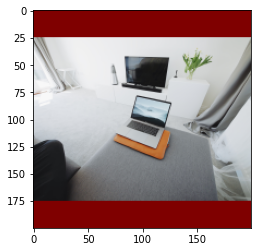

In [8]:
scaled_img = cv2.resize(img, (new_w, new_h), interpolation=interp)
scaled_img = cv2.copyMakeBorder(scaled_img, pad_top, pad_bot, pad_left, pad_right, borderType=cv2.BORDER_CONSTANT, value=127)
i = plt.imshow(scaled_img, cmap='gray')
scaled_img.shape

### 08 step #Run It All Together & Check it out

In [9]:
import cv2
import numpy as np

def resizeAndPad(img, size, padColor=0):

    h, w = img.shape[:2]
    sh, sw = size

    # interpolation method
    if h > sh or w > sw: # shrinking image
        interp = cv2.INTER_AREA
    else: # stretching image
        interp = cv2.INTER_CUBIC

    # aspect ratio of image
    aspect = w/h

    # compute scaling and pad sizing
    if aspect > 1: # horizontal image
        new_w = sw
        new_h = np.round(new_w/aspect).astype(int)
        pad_vert = (sh-new_h)/2
        pad_top, pad_bot = np.floor(pad_vert).astype(int), np.ceil(pad_vert).astype(int)
        pad_left, pad_right = 0, 0
    elif aspect < 1: # vertical image
        new_h = sh
        new_w = np.round(new_h*aspect).astype(int)
        pad_horz = (sw-new_w)/2
        pad_left, pad_right = np.floor(pad_horz).astype(int), np.ceil(pad_horz).astype(int)
        pad_top, pad_bot = 0, 0
    else: # square image
        new_h, new_w = sh, sw
        pad_left, pad_right, pad_top, pad_bot = 0, 0, 0, 0

    # set pad color
    if len(img.shape) == 3 and not isinstance(padColor, (list, tuple, np.ndarray)): # color image but only one color provided
        padColor = [padColor]*3

    # scale and pad
    scaled_img = cv2.resize(img, (new_w, new_h), interpolation=interp)
    scaled_img = cv2.copyMakeBorder(scaled_img, pad_top, pad_bot, pad_left, pad_right, borderType=cv2.BORDER_CONSTANT, value=padColor)

    return scaled_img

True

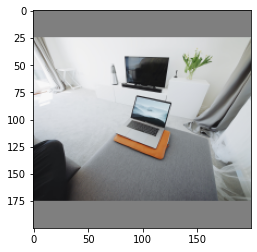

In [10]:
new_img = resizeAndPad(img, (200,200), 127)
i = plt.imshow(new_img, cmap='gray')
new_img.shape

# Saving the new image inside DATA folder
filename = 'DATA/tv_laptop_resized.jpg'
  
# Using cv2.imwrite() method
# Saving the image
cv2.imwrite(filename, new_img)

In [11]:
print("That's it! Thank you once again!\nI hope will be helpful.")

That's it! Thank you once again!
I hope will be helpful.
